In [95]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.ticker as mtick


import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [97]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Rakamin VIX-IDX/loan_data_2007_2014.csv')
df = df.drop("Unnamed: 0", axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **A. DATA CLEANING AND PREPARATION**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

**A.1. Handling Missing Values**

Feature with missing values + zero values with total % more than 15% will be droped

In [99]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mv_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mv_table = mv_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Missing Values'})
        mv_table['Total Zero + Missing Values'] = mv_table['Zero Values'] + mv_table['Missing Values']
        mv_table['% Total Zero + Missing Values'] = 100 * mv_table['Total Zero + Missing Values'] / len(df)
        mv_table['Data Type'] = df.dtypes
        mv_table = mv_table[
            mv_table.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mv_table.shape[0]) +
              " columns that have missing values.")
        return mv_table

miss_table = missing_values_table(df)
miss_table

Your selected dataframe has 74 columns and 466285 Rows.
There are 40 columns that have missing values.


,Zero Values,Missing Values,% of Missing Values,Total Zero + Missing Values,% Total Zero + Missing Values,Data Type
dti_joint,0,466285,100.0,466285,100.0,float64
annual_inc_joint,0,466285,100.0,466285,100.0,float64
total_cu_tl,0,466285,100.0,466285,100.0,float64
inq_fi,0,466285,100.0,466285,100.0,float64
all_util,0,466285,100.0,466285,100.0,float64
max_bal_bc,0,466285,100.0,466285,100.0,float64
open_rv_24m,0,466285,100.0,466285,100.0,float64
open_rv_12m,0,466285,100.0,466285,100.0,float64
il_util,0,466285,100.0,466285,100.0,float64
total_bal_il,0,466285,100.0,466285,100.0,float64


In [100]:
# miss_table[miss_table['% Total Zero + Missing Values'] > 15]
miss_table.drop(miss_table[(miss_table['% Total Zero + Missing Values'] < 15)].index, inplace=True)
feature_to_drop = list(miss_table.index.values)

In [101]:
df.drop(columns=feature_to_drop, axis=1, inplace=True)

In [102]:
df.shape

(466285, 44)

In [103]:
df.isnull().sum().sort_values(ascending=False)

emp_title                  27588
emp_length                 21008
last_pymnt_d                 376
revol_util                   340
last_credit_pull_d            42
open_acc                      29
total_acc                     29
earliest_cr_line              29
title                         20
annual_inc                     4
total_pymnt                    0
revol_bal                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
id                             0
total_pymnt_inv                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
policy_code                    0
total_rec_prncp                0
addr_state                     0
dti                            0
sub_grade                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term      

**A.2. Remove Meaningless Features**

In [104]:
for col in df.columns:
  print('---', col, '---')
  c = df[col].value_counts(dropna=False)
  p = df[col].value_counts(dropna=False, normalize=True)
  print(pd.concat([c,p], axis=1, keys=['counts', '%']))
  print('-----')

--- id ---
          counts         %
1077501        1  0.000002
26180404       1  0.000002
26219322       1  0.000002
26239577       1  0.000002
26290537       1  0.000002
...          ...       ...
3714715        1  0.000002
3703738        1  0.000002
3731030        1  0.000002
3705772        1  0.000002
9199665        1  0.000002

[466285 rows x 2 columns]
-----
--- member_id ---
          counts         %
1296599        1  0.000002
28653081       1  0.000002
28692177       1  0.000002
28702376       1  0.000002
28763241       1  0.000002
...          ...       ...
4686866        1  0.000002
4847180        1  0.000002
4724047        1  0.000002
4678105        1  0.000002
11061576       1  0.000002

[466285 rows x 2 columns]
-----
--- loan_amnt ---
       counts         %
10000   33023  0.070821
12000   25519  0.054728
15000   23486  0.050368
20000   22759  0.048809
35000   16596  0.035592
...       ...       ...
34250       1  0.000002
33400       1  0.000002
32150       1  0.000002

In [105]:
meaningless_features = ['id','emp_title','url', 'zip_code', 'title', 'sub_grade', 'policy_code', 'application_type', 'member_id', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'earliest_cr_line', 'issue_d']

In [106]:
df.drop(columns=meaningless_features, axis=1, inplace=True)

In [107]:
df.shape

(466285, 30)

In [108]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'],
      dtype='object')

**A.3. Handling Target Features**

In [109]:
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [110]:
df['loan_status'] = df['loan_status'].replace(['Late (31-120 days)', 'Late (16-30 days)', 'Default'], ['Charged Off', 'Charged Off', 'Charged Off'])

In [111]:
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [112]:
df.loan_status.value_counts()

Fully Paid     184739
Charged Off     51425
Name: loan_status, dtype: int64

In [113]:
df.shape

(236164, 30)

# **B. EDA**

In [114]:
len(df.loan_status)

236164

In [115]:
df_eda = df.copy()

**with y-axis as count**

In [116]:
def show_values_on_bars(axs, features):
    total = len(features)
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}%'.format(100 * p.get_height()/total)
            ax.text(_x, _y, value, ha="center", va='bottom', size=12) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [117]:
def with_hue(axs, feature, Number_of_categories, hue_categories):
    def _show_on_single_plot2(ax): 
        all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
        for bars in ax.containers:
            for i, p in enumerate(bars):
                total = sum(xgroup[i] for xgroup in all_heights)
                percentage = f'{(100 * p.get_height() / total) :.1f}%'
                ax.text(p.get_x() + p.get_width() / 2, p.get_height(), percentage, size=11, ha='center', va='bottom', rotation=45)

    if isinstance(axs, np.ndarray):
          for idx, ax in np.ndenumerate(axs):
              _show_on_single_plot2(ax)
    else:
          _show_on_single_plot2(axs)


Text(0.5, 1.0, '% of Loan Status by grade')

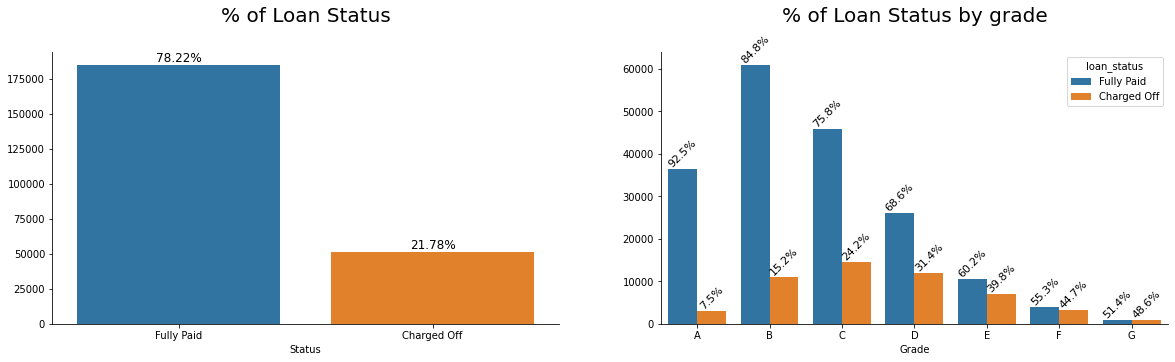

In [118]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='loan_status', data=df, ax=axes[0])
show_values_on_bars(axes, df.loan_status)

sns.countplot(x='grade', hue='loan_status', data=df, order=sorted(df['grade'].unique()), ax=axes[1])
with_hue(axes[1], df.grade, 7, 2)

sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('% of Loan Status', size=20, pad=30)
axes[1].set(xlabel='Grade', ylabel='')
axes[1].set_title('% of Loan Status by grade', size=20, pad=30)



In [119]:
df['emp_length'] = df['emp_length'].replace(['< 1 year'],['less than 1 y'])

In [120]:
df['pymnt_plan'].value_counts()

n    236157
y         7
Name: pymnt_plan, dtype: int64

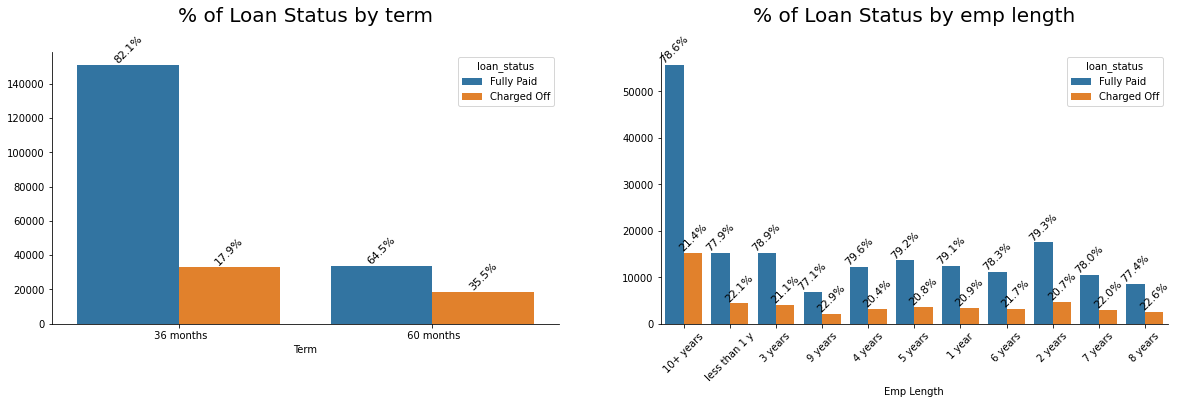

In [121]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='term', hue='loan_status', data=df, order=sorted(df['term'].unique()), ax=axes[0])
with_hue(axes[0], df.emp_length, 2, 2)

sns.countplot(x='emp_length', hue='loan_status', data=df, ax=axes[1])
with_hue(axes[1], df.emp_length, 11, 2)

sns.despine()
axes[0].set(xlabel='Term', ylabel='')
axes[0].set_title('% of Loan Status by term', size=20, pad=30)
axes[1].set(xlabel='Emp Length', ylabel='')
axes[1].set_title('% of Loan Status by emp length', size=20, pad=30)
axes[1].tick_params(axis='x', labelrotation = 45)



Text(0.5, 1.0, 'Distribution between Loant Amount and Installment')

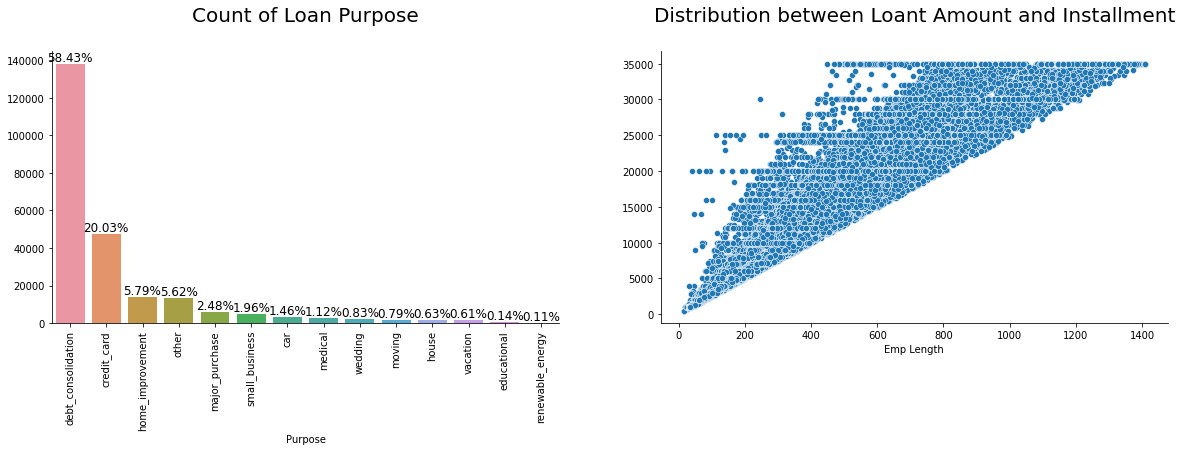

In [122]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='purpose', data=df, order=df['purpose'].value_counts().index, ax=axes[0])
show_values_on_bars(axes[0], df.loan_status)

sns.scatterplot(x='installment', y='loan_amnt', data=df, ax=axes[1])

sns.despine()
axes[0].set(xlabel='Purpose', ylabel='')
axes[0].set_title('Count of Loan Purpose', size=20, pad=30)
axes[0].tick_params(axis='x', labelrotation = 90)
axes[1].set(xlabel='Emp Length', ylabel='')
axes[1].set_title('Distribution between Loant Amount and Installment', size=20, pad=30)




**with y-axis as percentage**

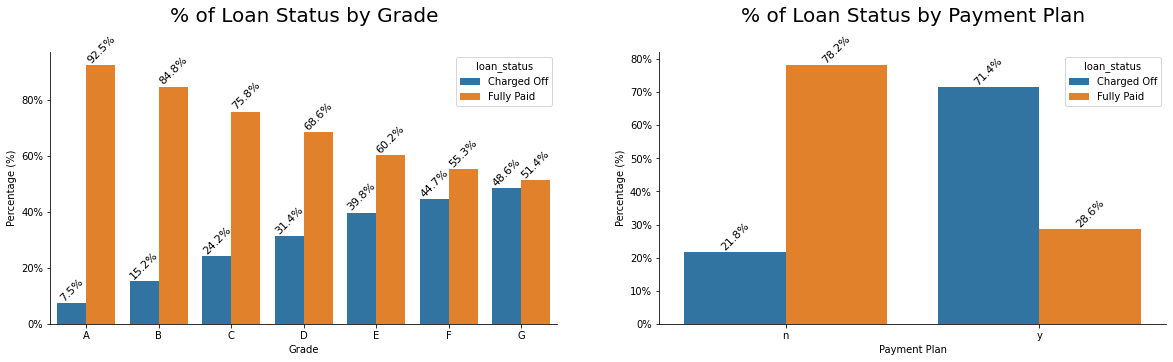

In [123]:
f, axes = plt.subplots(1, 2, figsize=(20,5))

df_eda['percentage(%)'] = 0 # a dummy column to refer to
for col, ax in zip(['grade', 'pymnt_plan'], axes.flatten()):
    counts = df_eda.groupby([col, 'loan_status']).count()
    freq_per_group = counts.div(counts.groupby(col).transform('sum')).reset_index()
    sns.barplot(x=col, y='percentage(%)', hue='loan_status', data=freq_per_group, ax=ax)

with_hue(axes[0], df_eda.grade, 7, 2)
with_hue(axes[1], df_eda.pymnt_plan, 2, 2)

sns.despine()
axes[0].set(xlabel='Grade', ylabel='Percentage (%)')
axes[0].set_title('% of Loan Status by Grade', size=20, pad=30)
axes[1].set(xlabel='Payment Plan', ylabel='Percentage (%)')
axes[1].set_title('% of Loan Status by Payment Plan', size=20, pad=30)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

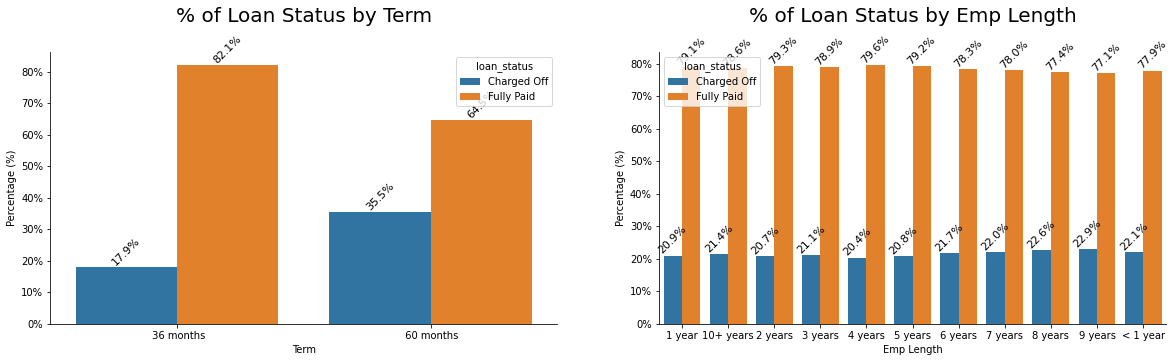

In [124]:
f, axes = plt.subplots(1, 2, figsize=(20,5))

df_eda['percentage(%)'] = 0 # a dummy column to refer to
for col, ax in zip(['term', 'emp_length'], axes.flatten()):
    counts = df_eda.groupby([col, 'loan_status']).count()
    freq_per_group = counts.div(counts.groupby(col).transform('sum')).reset_index()
    sns.barplot(x=col, y='percentage(%)', hue='loan_status', data=freq_per_group, ax=ax)

with_hue(axes[0], df_eda.grade, 7, 2)
with_hue(axes[1], df_eda.pymnt_plan, 2, 2)

sns.despine()
axes[0].set(xlabel='Term', ylabel='Percentage (%)')
axes[0].set_title('% of Loan Status by Term', size=20, pad=30)
axes[1].set(xlabel='Emp Length', ylabel='Percentage (%)')
axes[1].set_title('% of Loan Status by Emp Length', size=20, pad=30)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

Text(0.5, 1.0, '% of Loan Status by loan amount')

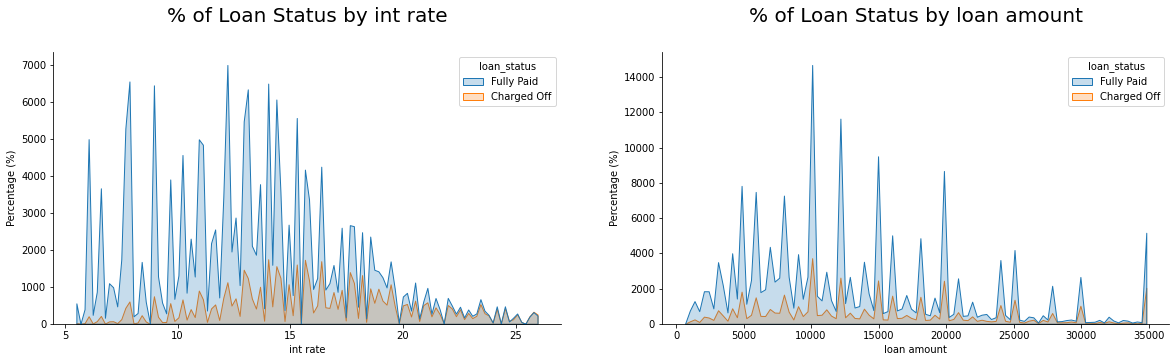

In [125]:
f, axes = plt.subplots(1, 2, figsize=(20,5))

sns.histplot(df_eda, x="int_rate", hue="loan_status", element="poly", ax=axes[0])
sns.histplot(df_eda, x="loan_amnt", hue="loan_status", element="poly", ax=axes[1])

sns.despine()
axes[0].set(xlabel='int rate', ylabel='Percentage (%)')
axes[0].set_title('% of Loan Status by int rate', size=20, pad=30)
axes[1].set(xlabel='loan amount', ylabel='Percentage (%)')
axes[1].set_title('% of Loan Status by loan amount', size=20, pad=30)





# **C. Features Engineering**

In [126]:
df_model = df.copy()

**C. 1. Handling Categorical Features**

In [127]:
categorical_col = list(df_model.select_dtypes(include=["object"]).columns)
categorical_col

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status']

Fill missing value with mode

In [128]:
df_model[categorical_col].isnull().sum().sort_values(ascending=False)

emp_length             9191
term                      0
grade                     0
home_ownership            0
verification_status       0
loan_status               0
pymnt_plan                0
purpose                   0
addr_state                0
initial_list_status       0
dtype: int64

In [129]:
df_model['emp_length'] = df_model['emp_length'].fillna(df_model['emp_length'].mode()[0])

In [130]:
df_model[categorical_col].isnull().sum().sort_values(ascending=False)

term                   0
grade                  0
emp_length             0
home_ownership         0
verification_status    0
loan_status            0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
dtype: int64

Encoding Features


*   One-Hot Encoding
*   Label Encoding

In [131]:
label_encoder = preprocessing.LabelEncoder()

label_enc_features = ['grade', 'emp_length', 'home_ownership']
for col in label_enc_features:
    df_model[col]= label_encoder.fit_transform(df_model[col])

In [132]:
df_onehot = pd.get_dummies(df_model[['term']], prefix='term', prefix_sep="_")
df_onehot2 = pd.get_dummies(df_model[['verification_status']], prefix="verification_status", prefix_sep="_")
df_onehot3 = pd.get_dummies(df_model[['pymnt_plan']], prefix="pymnt_plan", prefix_sep="_")
df_onehot4 = pd.get_dummies(df_model[['purpose']], prefix="purpose", prefix_sep="_")
df_onehot5 = pd.get_dummies(df_model[['addr_state']], prefix="addr_state", prefix_sep="_")
df_onehot6 = pd.get_dummies(df_model[['initial_list_status']], prefix="initial_list_status", prefix_sep="_")

df_final_onehot = df_onehot.join([df_onehot2, df_onehot3, df_onehot4, df_onehot5, df_onehot6])

**C. 2. Handling Numerical Features**

In [133]:
numerical_col = list(df_model.select_dtypes(exclude=["object"]).columns)
numerical_col

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee']

Filling Missing value with median

In [134]:
df_model[numerical_col].isnull().sum().sort_values(ascending=False)

revol_util                 192
loan_amnt                    0
recoveries                   0
total_rec_late_fee           0
total_rec_int                0
total_rec_prncp              0
total_pymnt_inv              0
total_pymnt                  0
out_prncp_inv                0
out_prncp                    0
total_acc                    0
revol_bal                    0
funded_amnt                  0
open_acc                     0
dti                          0
annual_inc                   0
home_ownership               0
emp_length                   0
grade                        0
installment                  0
int_rate                     0
funded_amnt_inv              0
collection_recovery_fee      0
dtype: int64

In [135]:
median_value = df_model['revol_util'].median()
df_model['revol_util'].fillna(value = median_value, inplace = True) 

In [136]:
df_model[numerical_col].isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
dti                        0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
dtype: int64

In [137]:
df_model = df_final_onehot.join(df_model)

In [138]:
df_model.drop(columns=['term', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'], inplace=True)

**C. 3. Handling Target Features**

In [139]:
df_model['loan_status'].value_counts()

Fully Paid     184739
Charged Off     51425
Name: loan_status, dtype: int64

In [140]:
df_model['loan_status'] = df_model['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [141]:
df_model['loan_status'].value_counts()

1    184739
0     51425
Name: loan_status, dtype: int64

# **D. Modelling and Evaluation ML**

In [142]:
df_model.columns

Index(['term_ 36 months', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'pymnt_plan_n', 'pymnt_plan_y', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY',
       'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME',
       'addr_state_MI', 'addr_state_MN', '

In [143]:
x = df_model.drop(['loan_status'],axis=1)
y = df_model['loan_status']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [145]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_scaled = ss.fit_transform(X_train)
x_test_scaled = ss.transform(X_test)

In [146]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train.ravel())

In [147]:
unique, counts = np.unique(y_train_res, return_counts=True)
dict(zip(unique, counts))

{0: 147755, 1: 147755}

In [148]:
models = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'Accuracy', 'F1-Score'])

logistic Reg

In [149]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000) #model
log_reg_model.fit(x_train_res,y_train_res) 

train_predictions_log = log_reg_model.predict(x_train_res) #train the model
test_predictions_log = log_reg_model.predict(x_test_scaled) #test the model

precision = precision_score(y_test,test_predictions_log)
recall = recall_score(y_test,test_predictions_log)
accu = accuracy_score(y_test,test_predictions_log)
f1_sc = f1_score(y_test,test_predictions_log) 

print('Logistic regression model evaluation:')
print('Precision: ', precision)
print('Recall: ', recall)
print('\nAccuracy: ',accu)
print('f1_score: ', f1_sc)

new_row = {"Model": "Logistic Regression","Precision": precision, "Recall": recall, "Accuracy": accu, "F1-Score": f1_sc}
models = models.append(new_row, ignore_index=True)

Logistic regression model evaluation:
Precision:  0.9958202998597778
Recall:  0.9985128704304564

Accuracy:  0.9955539559206487
f1_score:  0.997164767510936


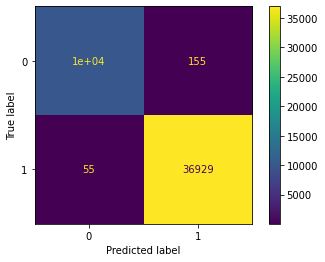

In [150]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg_model,x_test_scaled,y_test)

In [151]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test,test_predictions_log))

print('Accuracy Score: ',accuracy_score(y_test,test_predictions_log))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10249
           1       1.00      1.00      1.00     36984

    accuracy                           1.00     47233
   macro avg       1.00      0.99      0.99     47233
weighted avg       1.00      1.00      1.00     47233

Accuracy Score:  0.9955539559206487


Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42) #model
random_forest_model.fit(x_train_res,y_train_res) 

train_predictions_rf = random_forest_model.predict(x_train_res) #train the model
test_predictions_rf = random_forest_model.predict(x_test_scaled) #test the model

precision = precision_score(y_test,test_predictions_rf)
recall = recall_score(y_test,test_predictions_rf)
accu = accuracy_score(y_test,test_predictions_rf)
f1_sc = f1_score(y_test,test_predictions_rf) 

print('Random Forest Classifier model evaluation:')
print('Precision: ', precision)
print('Recall: ', recall)
print('\nAccuracy: ',accu)
print('f1_score: ', f1_sc)

new_row = {"Model": "Random Forest Classifier","Precision": precision, "Recall": recall, "Accuracy": accu, "F1-Score": f1_sc}
models = models.append(new_row, ignore_index=True)

Random Forest Classifier model evaluation:
Precision:  0.9972729972729972
Recall:  0.9987021414665801

Accuracy:  0.9968454258675079
f1_score:  0.9979870577268614


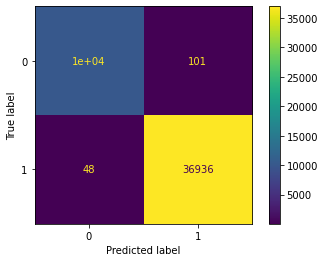

In [153]:
plot_confusion_matrix(random_forest_model,x_test_scaled,y_test)

In [154]:
print(classification_report(y_test,test_predictions_rf))

print('Accuracy Score: ',accuracy_score(y_test,test_predictions_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10249
           1       1.00      1.00      1.00     36984

    accuracy                           1.00     47233
   macro avg       1.00      0.99      1.00     47233
weighted avg       1.00      1.00      1.00     47233

Accuracy Score:  0.9968454258675079


Decission Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier() #model
dtc_model.fit(x_train_scaled,y_train) 

train_predictions_dtc = dtc_model.predict(x_train_scaled) #train the model
test_predictions_dtc = dtc_model.predict(x_test_scaled) #test the model

precision = precision_score(y_test,test_predictions_dtc)
recall = recall_score(y_test,test_predictions_dtc)
accu = accuracy_score(y_test,test_predictions_dtc)
f1_sc = f1_score(y_test,test_predictions_dtc) 

print('Decision Tree Classifier model evaluation:')
print('Precision: ', precision)
print('Recall: ', recall)
print('\nAccuracy: ',accu)
print('f1_score: ', f1_sc)

new_row = {"Model": "Decision Tree Classifier","Precision": precision, "Recall": recall, "Accuracy": accu, "F1-Score": f1_sc}
models = models.append(new_row, ignore_index=True)

Decision Tree Classifier model evaluation:
Precision:  0.9977274571869167
Recall:  0.997160934458144

Accuracy:  0.9959985603285838
f1_score:  0.9974441153799342


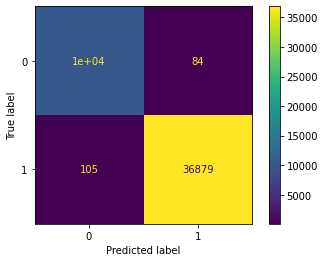

In [156]:
plot_confusion_matrix(dtc_model,x_test_scaled,y_test)

In [157]:
print(classification_report(y_test,test_predictions_dtc))

print('Accuracy Score: ',accuracy_score(y_test,test_predictions_dtc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10249
           1       1.00      1.00      1.00     36984

    accuracy                           1.00     47233
   macro avg       0.99      0.99      0.99     47233
weighted avg       1.00      1.00      1.00     47233

Accuracy Score:  0.9959985603285838


In [158]:
models

,Model,Precision,Recall,Accuracy,F1-Score
0,Logistic Regression,0.995820,0.998513,0.995554,0.997165
1,Random Forest Classifier,0.997273,0.998702,0.996845,0.997987
2,Decision Tree Classifier,0.997727,0.997161,0.995999,0.997444


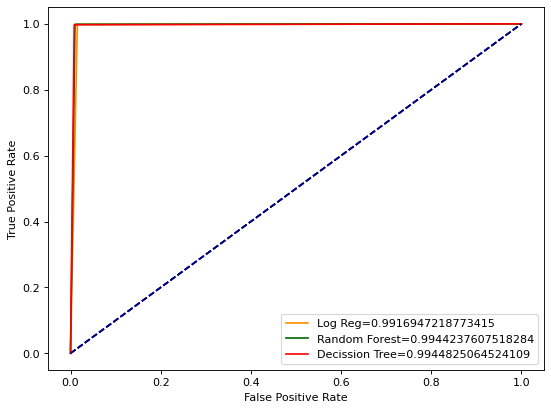

In [159]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
fpr, tpr, _ =roc_curve(y_test, test_predictions_log)
auc = roc_auc_score(y_test, test_predictions_log)
plt.plot(fpr,tpr,label="Log Reg="+str(auc),color='darkorange')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

fpr, tpr, _ =roc_curve(y_test,  test_predictions_rf)
auc = roc_auc_score(y_test, test_predictions_rf)
plt.plot(fpr,tpr,label="Random Forest="+str(auc),color='darkgreen')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

fpr, tpr, _ =roc_curve(y_test,  test_predictions_dtc)
auc = roc_auc_score(y_test, test_predictions_dtc)
plt.plot(fpr,tpr,label="Decission Tree="+str(auc),color='red')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Features Importance**

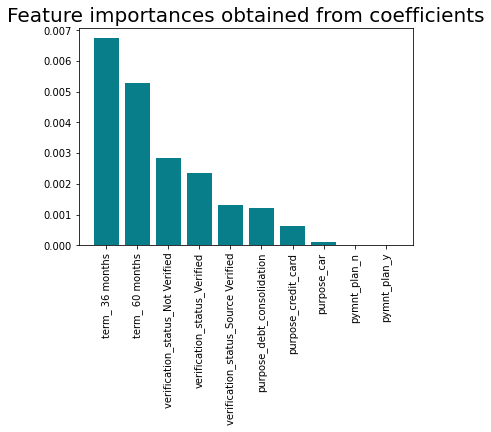

In [160]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': random_forest_model.feature_importances_
})
importances = importances.head(10).sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()